In [1]:
import pandas as pd
import numpy as np
import random
import math
from sklearn.cluster import KMeans

#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

data = pd.read_csv('processedData.csv')
data.shape

(9374, 26)

In [42]:
data.dtypes

Accident_Index                                  object
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Day_of_Week                                      int64
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_Detail                                  int64
2nd_Road_Number                                  int64
Pedestrian_Crossing-Physical_Facilities          int64
Light_Cond

In [43]:
#remove columns that are not important to this analysis
excluded = ['Accident_Index', 'Date', 'Time', 'Location_Northing_OSGR', 'Location_Easting_OSGR', 'Longitude', 'Latitude', 'Local_Authority_(Highway)', 'Local_Authority_(District)', 'LSOA_of_Accident_Location']
cols = list(dict(data.dtypes).keys())
cols = [val for val in cols if val not in excluded]

In [47]:
# Convert DataFrame to matrix
matr = data[cols].values
# Using sklearn
# 3 centroid cause 5 created odd cluster with 4 samples

km = KMeans(n_clusters=3)
km.fit(matr)
# Get cluster assignment labels
labels = km.labels_
# Format results into DataFrame
data['class'] = labels

In [91]:
for i in data['class'].unique():
    print('class:', i, 'shape:', data.loc[data['class'] == i].shape)

class: 0 shape: (4332, 27)
class: 1 shape: (854, 27)
class: 2 shape: (4188, 27)


In [90]:
clster0 = data.loc[data['class'] == 0]
clster1 = data.loc[data['class'] == 1]
clster2 = data.loc[data['class'] == 2]

clsts = [clster0, clster1, clster2]

AttriDiffDF = pd.DataFrame()

ignoreCols = ['TimeVals', 'DateVals', 'class']

for col in cols:
    if (col in ignoreCols):
        continue
    dSamps = data.shape[0]
    colDict = dict(data[col].value_counts())
    for cl in range(len(clsts)):
        clst = clsts[cl]
        cSamps = clst.shape[0]
        cltDict = dict(clst[col].value_counts())
        
        for key in cltDict.keys():
            dPerc = colDict[key] / dSamps *100
            cPerc = cltDict[key] / cSamps *100
            vals = {'name': col, 'class': cl, 'value': key, 'percInData': dPerc, 'percInClst': cPerc, 'percDiff': cPerc - dPerc}
            AttriDiffDF = AttriDiffDF.append(vals, ignore_index = True)
            
AttriDiffDF.sort_values(by='percDiff')

,class,name,percDiff,percInClst,percInData,value
177,1.0,Junction_Detail,-7.083472,20.023419,27.106891,0.0
155,1.0,Road_Type,-6.392963,81.381733,87.774696,6.0
10,1.0,Number_of_Vehicles,-5.082997,27.400468,32.483465,1.0
42,0.0,1st_Road_Class,-3.966847,59.879963,63.846810,3.0
322,2.0,Pedestrian_Crossing-Physical_Facilities,-3.527034,66.069723,69.596757,0.0
...,...,...,...,...,...,...
100,1.0,1st_Road_Number,12.345673,13.583138,1.237465,3218.0
99,1.0,1st_Road_Number,12.877814,14.168618,1.290804,4090.0
98,1.0,1st_Road_Number,16.922086,18.618267,1.696181,4140.0
97,1.0,1st_Road_Number,30.225613,33.255269,3.029656,4020.0


mean:  0.4387171771859944
std:  3.0191129994604906
upper limit:  9.496056175567466
lower limit:  -8.618621821195477


<AxesSubplot:>

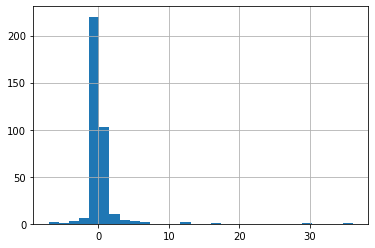

In [102]:
cSTD = AttriDiffDF['percDiff'].std()
cMean = AttriDiffDF['percDiff'].mean()
cLow = cMean - 3 * cSTD
cUp = cMean + 3 * cSTD

print('mean: ', cMean)
print('std: ', cSTD)
print('upper limit: ', cMean + 3 * cSTD)
print('lower limit: ', cMean - 3 * cSTD)

AttriDiffDF['percDiff'].hist(bins=30)

<AxesSubplot:>

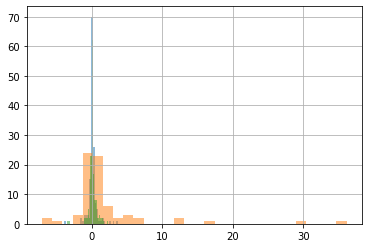

In [112]:
AttriDiffDF.loc[AttriDiffDF['class'] == 0]['percDiff'].hist(bins=30, alpha=0.5)
AttriDiffDF.loc[AttriDiffDF['class'] == 1]['percDiff'].hist(bins=30, alpha=0.5)
AttriDiffDF.loc[AttriDiffDF['class'] == 2]['percDiff'].hist(bins=30, alpha=0.5)

<AxesSubplot:>

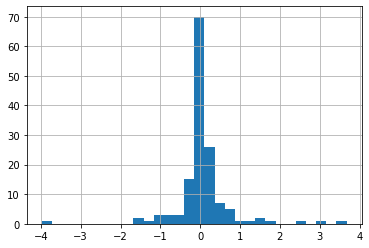

In [113]:
AttriDiffDF.loc[AttriDiffDF['class'] == 0]['percDiff'].hist(bins=30)

<AxesSubplot:>

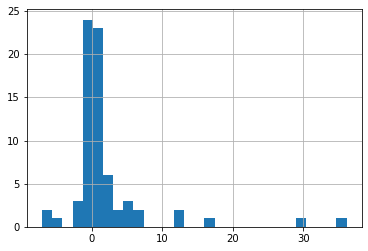

In [108]:
AttriDiffDF.loc[AttriDiffDF['class'] == 1]['percDiff'].hist(bins=30)

<AxesSubplot:>

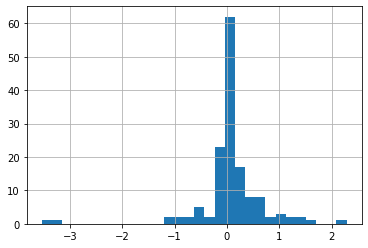

In [107]:
AttriDiffDF.loc[AttriDiffDF['class'] == 2]['percDiff'].hist(bins=30)

In [115]:
data['TimeVals'].value_counts()

1079    89
1019    85
959     84
1109    82
719     81
        ..
468      1
436      1
428      1
420      1
1407     1
Name: TimeVals, Length: 1216, dtype: int64